# Advanced Operations, Detecting Faces and Features
> After completing this chapter, you will have a deeper knowledge of image processing as you will be able to detect edges, corners, and even faces! You will learn how to detect not just front faces but also face profiles, cat, or dogs. You will apply your skills to more complex real-world applications. Learn to master several widely used image processing techniques with very few lines of code! This is the Summary of lecture "Image Processing in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Vision]
- image: images/building_corner.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

plt.rcParams['figure.figsize'] = (10, 8)

## Finding the edges with Canny

### Edges
In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.



In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

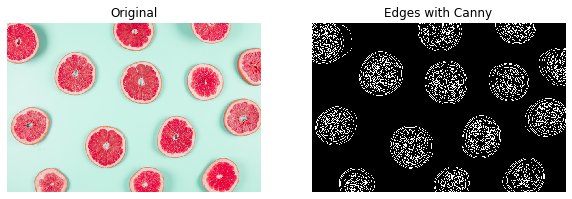

In [3]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('./dataset/toronjas.jpg')

# Convert image to grayscale
grapefruitb = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Edges with Canny")

### Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the `canny()` function.

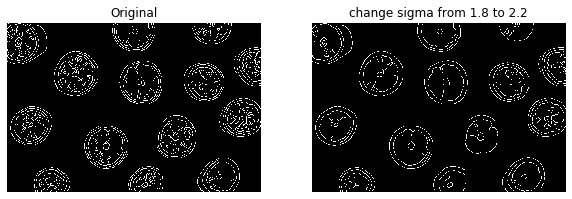

In [4]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Show resulting image
plot_comparison(edges_1_8, edges_2_2, 'change sigma from 1.8 to 2.2')

## Right around the corner


## Perspective
In this exercise, you will detect the corners of a building using the Harris corner detector.



In [5]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

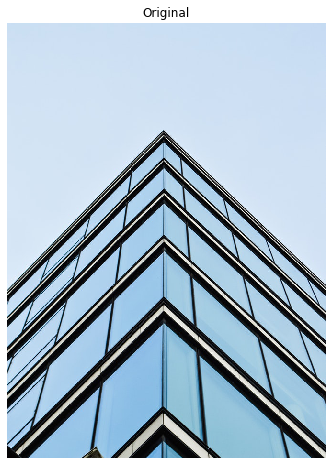

In [6]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('./dataset/corners_building_top.jpg')

# Convert image from RGB to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')

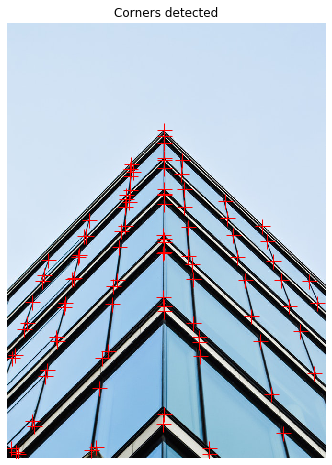

In [7]:
show_image_with_corners(building_image, coords)

### Less corners
In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the `min_distance` attribute parameter of the `corner_peaks()` function.

In [8]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print('With a min_distance set to 40, we detect a total', len(coords_w_min_40), 'corners in the image.')

With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


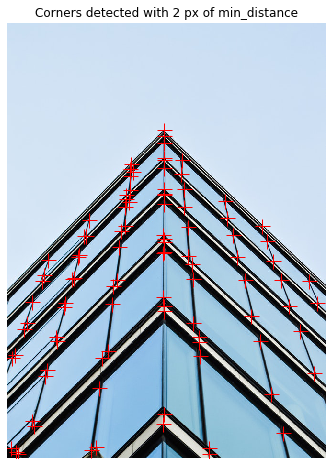

In [9]:
# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")

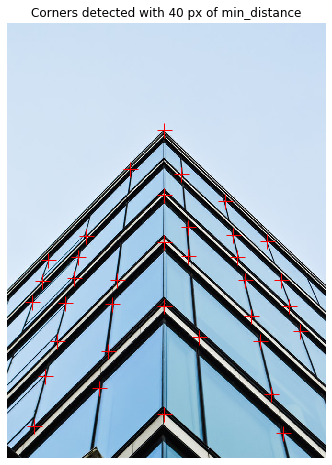

In [10]:
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

## Face detection


### Is someone there?
In this exercise, you will check whether or not there is a person present in an image taken at night.



In [11]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

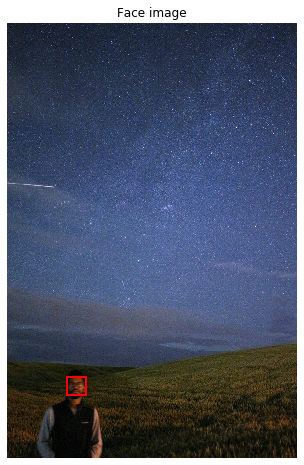

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


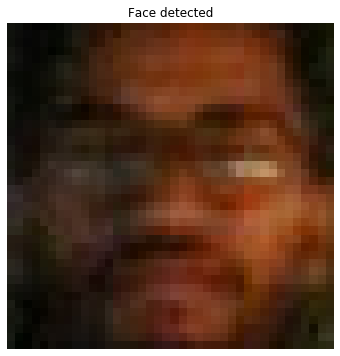

In [12]:
from skimage import data
from skimage.feature import Cascade

night_image = imread('./dataset/face_det3.jpg')

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(10, 10), max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

### Multiple faces
In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!



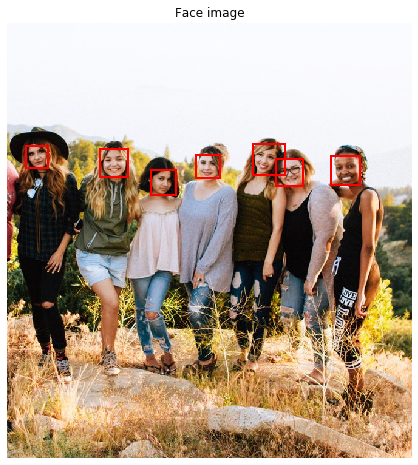

{'r': 199, 'c': 405, 'width': 52, 'height': 52}


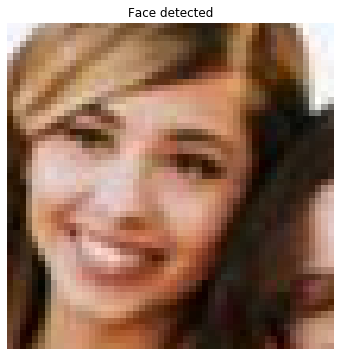

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


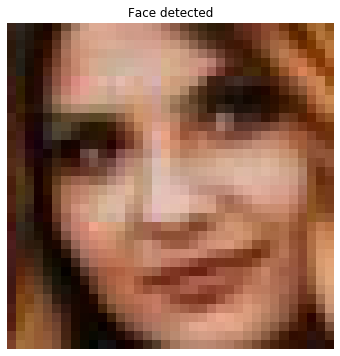

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


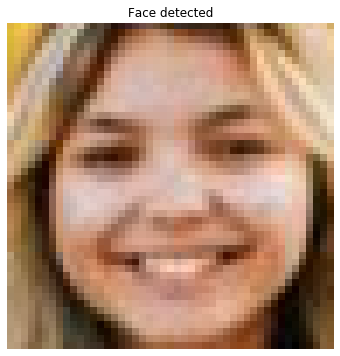

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


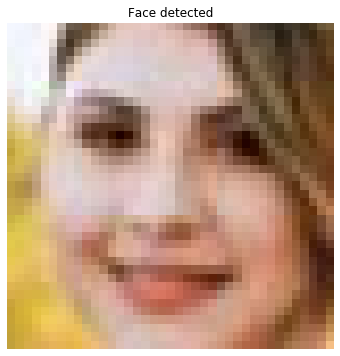

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


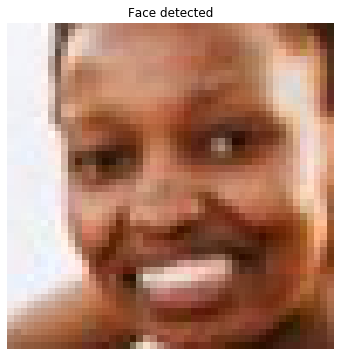

{'r': 224, 'c': 443, 'width': 45, 'height': 45}


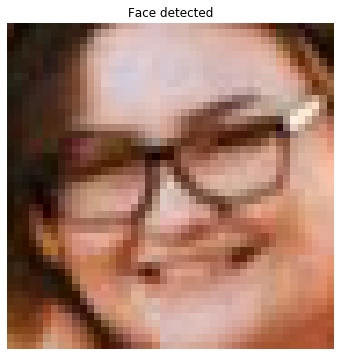

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


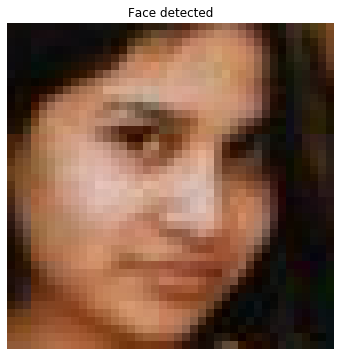

In [13]:
friends_image = imread('./dataset/face_det_friends22.jpg')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show detected faces
show_detected_face(friends_image, detected)

### Segmentation and face detection
Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the `slic()` function for segmentation, pre-process the image before passing it to the face detector.

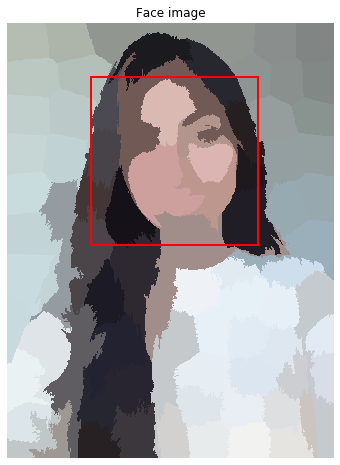

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


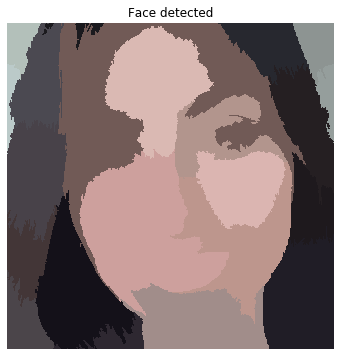

In [14]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = imread('./dataset/face_det9.jpg')

# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

You applied segementation to the image before passing it to the face detector and it's finding the face even when the image is relatively large.
This time you used 1000 by 1000 pixels as the maximum size of the searching window because the face in this case was indeed rather larger in comparison to the image.

## Real-world applications


### Privacy protection
Let's look at a real-world application of what you have learned in the course.

In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

You can use the gaussian filter for the blurriness.

In [15]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

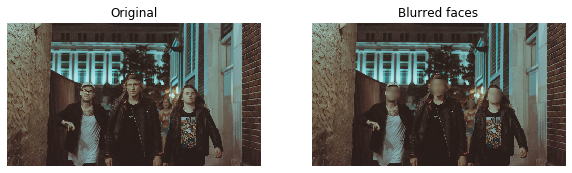

In [19]:
from skimage.filters import gaussian

group_image = imread('dataset/face_det25.jpg')
group_image_o = group_image.copy()

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma=8, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)
    
plot_comparison(group_image_o, resulting_image, 'Blurred faces')

### Help Sally restore her graduation photo
You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.

You will be fixing the problems of this image by:

- Rotating it to be uprightusing `rotate()`
- Applying noise reduction with `denoise_tv_chambolle()`
- Reconstructing the damaged parts with `inpaint_biharmonic()` from the inpaint module.

In [17]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

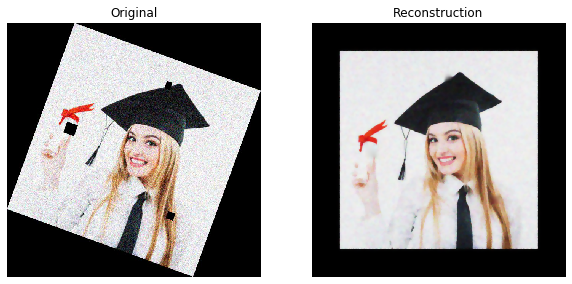

In [18]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

damaged_image = imread('./dataset/sally_damaged_image.jpg')

# Transform the image so it's not rotate
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img, weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

# Show the resulting image
plot_comparison(damaged_image, result, "Reconstruction")